**PREPROCESSING**


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Path to dataset files: C:\Users\sansa\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1
test columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 
 train columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 TRAIN: 1,296,675 rows × 22 columns
 TEST: 555,719 rows × 22 columns

 Columns:
['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_nu

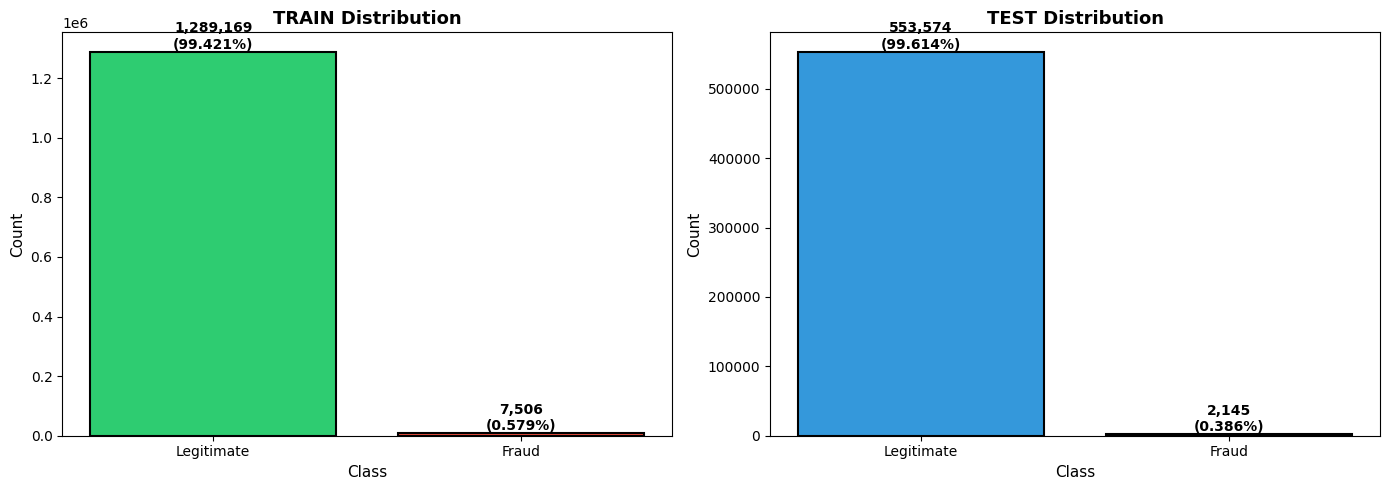


4. KEY FEATURES

 Feature types:
   Numeric: 9
   Categorical: 12

 Amount (amt) statistics:
   Mean: $70.35
   Median: $47.52
   Std: $160.32
   Range: $1.00 - $28948.90

   By class:
   Legitimate: $67.67
   Fraud: $531.32

 Time period:
   From: 2019-01-01 00:00:18
   To: 2020-06-21 12:13:37
   Duration: 537 days

 Numeric features summary:
                    mean           std           min           max
cc_num      4.171920e+17  1.308806e+18  6.041621e+10  4.992346e+18
amt         7.035104e+01  1.603160e+02  1.000000e+00  2.894890e+04
zip         4.880067e+04  2.689322e+04  1.257000e+03  9.978300e+04
lat         3.853762e+01  5.075808e+00  2.002710e+01  6.669330e+01
long       -9.022634e+01  1.375908e+01 -1.656723e+02 -6.795030e+01
city_pop    8.882444e+04  3.019564e+05  2.300000e+01  2.906700e+06
unix_time   1.349244e+09  1.284128e+07  1.325376e+09  1.371817e+09
merch_lat   3.853734e+01  5.109788e+00  1.902779e+01  6.751027e+01
merch_long -9.022646e+01  1.377109e+01 -1.666712e+

In [1]:
%run eda_analysis.ipynb

Drop columns we don't need


In [2]:
col_to_drop = ['cc_num','trans_num','first','last','street']

df_train = df_train.drop(columns=col_to_drop)
df_test = df_test.drop(columns=col_to_drop)

print(f" Dropped {len(col_to_drop)} columns")
print("test columns : \n \n",df_test.columns)
print("\n \n train columns : \n \n",df_train.columns)

 Dropped 5 columns
test columns : 
 
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_datetime'],
      dtype='object')

 
 train columns : 
 
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_datetime'],
      dtype='object')


Add / Modify columns so that our model can understand the data

**TIME DATA**


 Fraud transaction by hour: 
hour
22    1931
23    1904
1      658
0      635
2      625
dtype: int64

 Distribution of 'hour' (fraud vs legitimate):

Fraud transactions by hour:
hour
22    1931
23    1904
1      658
0      635
2      625
dtype: int64

 Fraud rate by time period:
   Morning: 334 frauds / 295,717 transactions = 0.113%
   Afternoon: 466 frauds / 392,023 transactions = 0.119%
   Evening: 2,229 frauds / 329,172 transactions = 0.677%
   Night: 4,477 frauds / 279,763 transactions = 1.600%


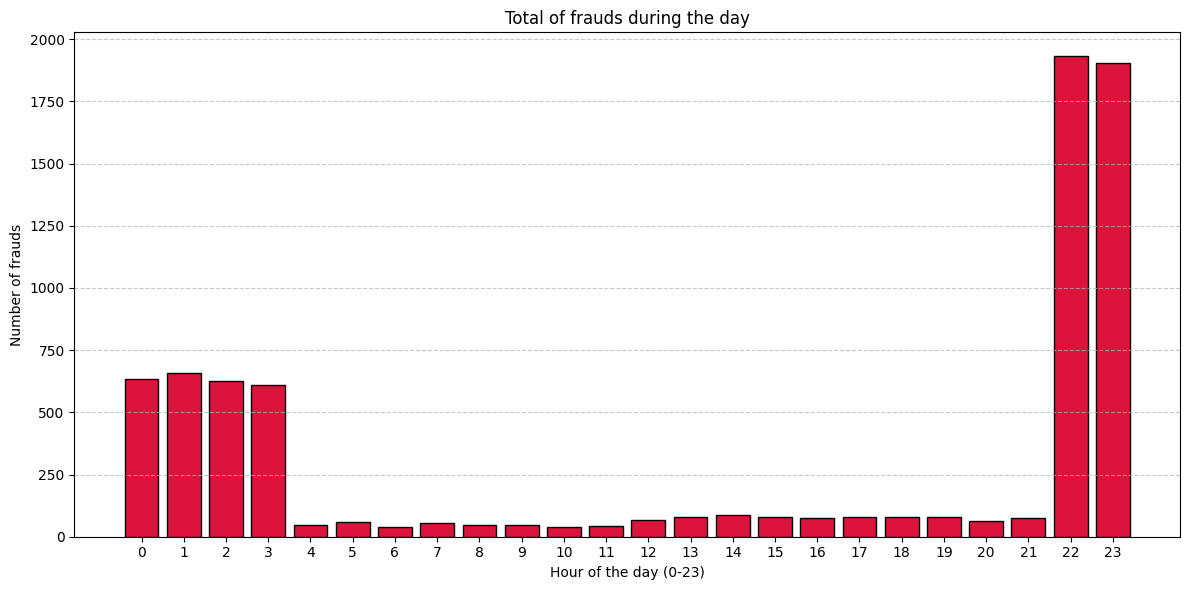

In [3]:
# Add / Modify columns so that our model can understand the data 

# ----------------------------------------------------
#                           TIME 
# ----------------------------------------------------

# Convert to datetime type 
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])


# Get hours (0 to 23)
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

# Get day of week (0 = Monday / 6= Sunday)
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.dayofweek
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.dayofweek

# Get day of month ( 1 to 31)
df_train['day_of_month'] = df_train['trans_date_trans_time'].dt.day
df_test['day_of_month'] = df_test['trans_date_trans_time'].dt.day

# Get month (1 to 12)
df_train['month'] = df_train['trans_date_trans_time'].dt.month
df_test['month'] = df_test['trans_date_trans_time'].dt.month

# Weekend or not ? 
df_train['is_weekend'] = (df_train['day_of_week'] >= 5).astype(int)
df_test['is_weekend'] = (df_test['day_of_week'] >= 5).astype(int)

# Function to categrize time of day
def get_time_period(hour):
    """ 
    Categorize hour into time periods
    0: Morning (low fraud risk)
    1: Afternoon (low fraud risk)
    2: Evening (moderate fraud risk)
    3: Night (high fraud risk)
    """
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 23:
        return 2
    else:
        return 3

# Apply 
df_train['time_period'] = df_train['hour'].apply(get_time_period)
df_test['time_period'] = df_test['hour'].apply(get_time_period)

# Analysis 
print("\n Fraud transaction by hour: ")
fraud_by_hour = df_train[df_train['is_fraud'] == 1].groupby('hour').size()
print(fraud_by_hour.sort_values(ascending=False).head(5))

# Distribution analysis
print("\n Distribution of 'hour' (fraud vs legitimate):")
print("\nFraud transactions by hour:")
fraud_by_hour = df_train[df_train['is_fraud'] == 1].groupby('hour').size()
print(fraud_by_hour.sort_values(ascending=False).head(5))

print("\n Fraud rate by time period:")
for period, name in [(0, 'Morning'), (1, 'Afternoon'), (2, 'Evening'), (3, 'Night')]:
    total = (df_train['time_period'] == period).sum()
    frauds = ((df_train['time_period'] == period) & (df_train['is_fraud'] == 1)).sum()
    rate = (frauds / total * 100) if total > 0 else 0
    print(f"   {name}: {frauds:,} frauds / {total:,} transactions = {rate:.3f}%")

plt.figure(figsize=(12, 6))
plt.bar(fraud_by_hour.index, fraud_by_hour.values, color='crimson', edgecolor='black')
plt.title('Total of frauds during the day')
plt.xlabel('Hour of the day (0-23)')
plt.ylabel('Number of frauds')
plt.xticks(range(24))  # S'assurer que chaque heure a une graduation
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

**DISTANCE DATA**


 Distance statistics (TRAIN):
   Mean: 84.99 km
   Median: 88.61 km
   Std Dev: 31.61 km
   Min: 0.03 km
   Max: 156.88 km
  ligne 2: 30.22641496342932
 Merchant : fraud_Heller, Gutmann and Zieme

 Distance percentiles:
   25th percentile: 62.71 km
   50th percentile: 88.61 km
   75th percentile: 108.51 km
   90th percentile: 123.80 km
   95th percentile: 133.03 km
   99th percentile: 146.07 km

 Distance by class:

   Legitimate transactions:
      Mean: 84.99 km
      Median: 88.61 km
      75th percentile: 108.51 km
      95th percentile: 133.03 km

   Fraud transactions:
      Mean: 85.17 km
      Median: 88.46 km
      75th percentile: 108.38 km
      95th percentile: 132.70 km

 Distance categories distribution:
   Very Close (<10 km): 44 frauds / 8,224 = 0.535%
   Close (10-50 km): 1,108 frauds / 198,280 = 0.559%
   Regional (50-200 km): 6,354 frauds / 1,090,171 = 0.583%
   Far (200-500 km): 0 frauds / 0 = 0.000%
   Very Far (>500 km): 0 frauds / 0 = 0.000%

4. CREATING VISUALI

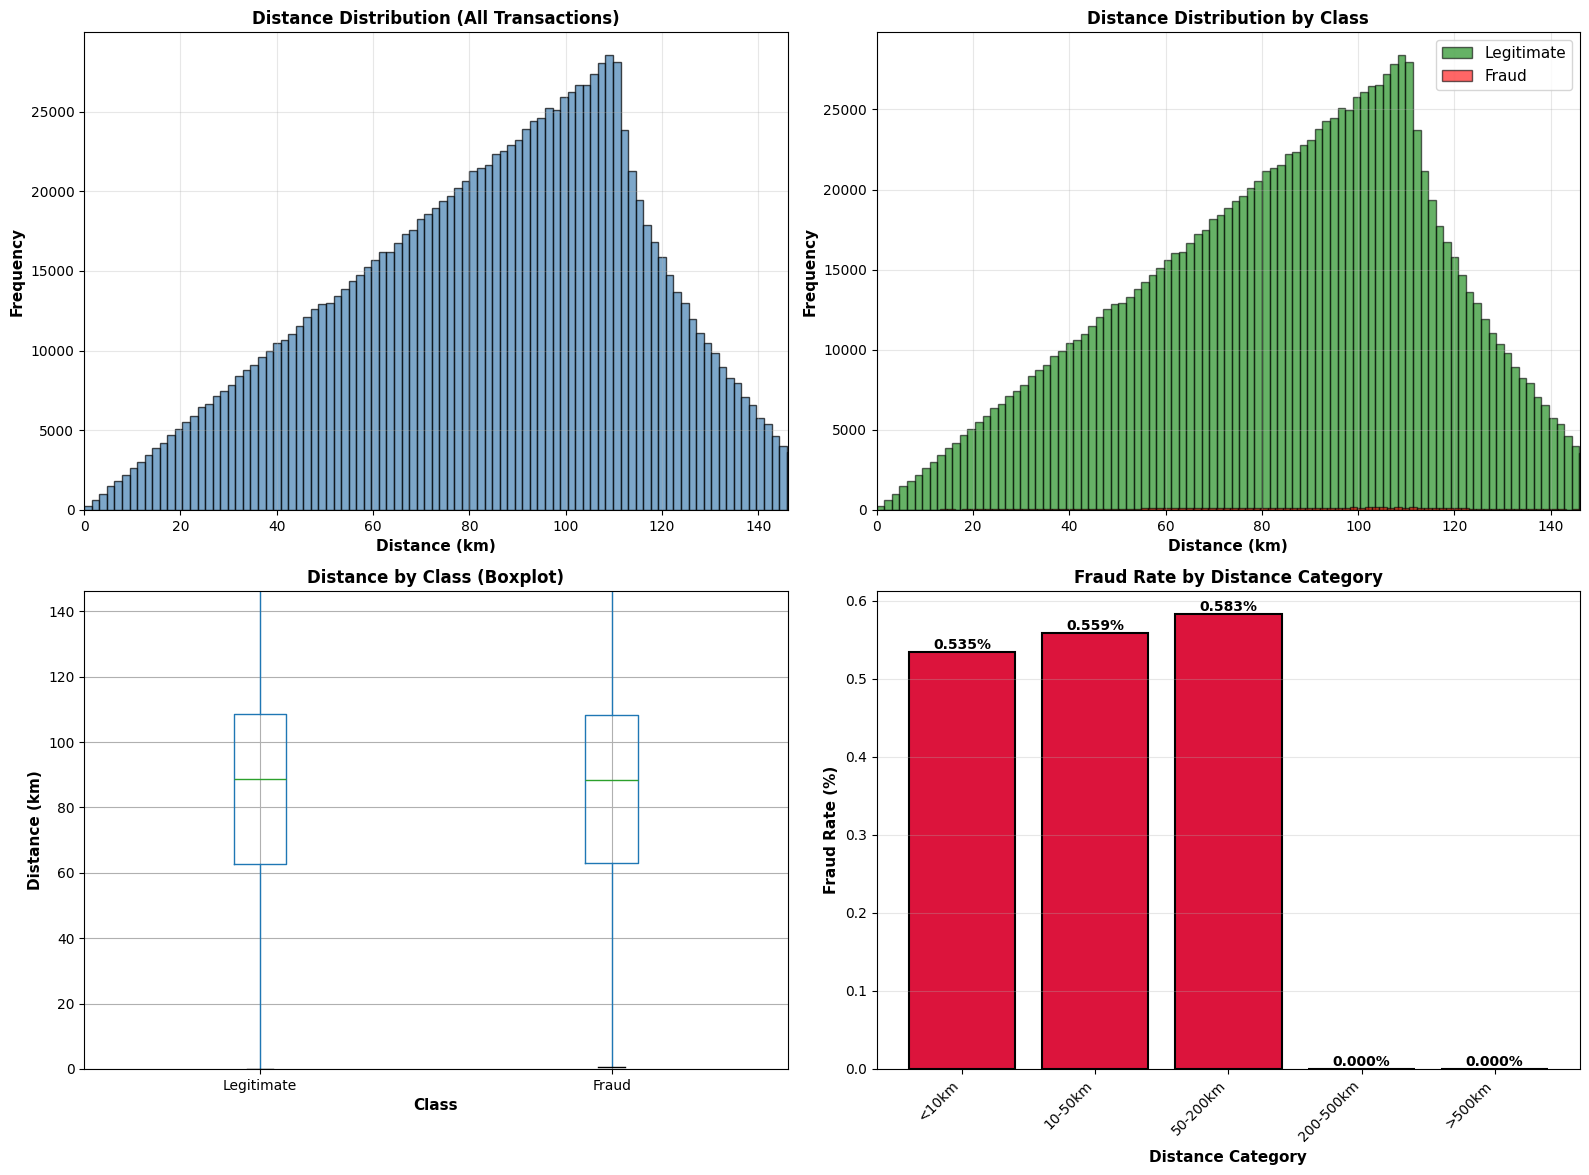


 What we created:
   • distance_km: Euclidean distance between customer and merchant

 Key findings:
   • Mean distance (Legitimate): 84.99 km
   • Mean distance (Fraud): 85.17 km

 Current shapes:
   TRAIN: (1296675, 25)
   TEST: (555719, 25)


In [4]:

geographic_columns = ['lat','long','merch_lat','merch_long']

# Compute the distance between client and merchant
diff_lat_train = df_train['lat'] - df_train['merch_lat']
diff_long_train = df_train['long'] - df_train['merch_long']

# Pythagorean theorem (in degrees because of coordinates)
dist_degree_train = np.sqrt(diff_lat_train**2 + diff_long_train**2)
dist_km_train = dist_degree_train * 111   # Approximation, 1° is about 111km 
df_train['distance_km'] = dist_km_train


# Same for test dataset 
diff_lat_test = df_test['lat'] - df_test['merch_lat']
diff_long_test = df_test['long'] - df_test['merch_long']
dist_degree_test = np.sqrt(diff_lat_test**2 + diff_long_test**2)
dist_km_test = dist_degree_test * 111  
df_test['distance_km'] = dist_km_test

# Overall statistics
print("\n Distance statistics (TRAIN):")
print(f"   Mean: {df_train['distance_km'].mean():.2f} km")
print(f"   Median: {df_train['distance_km'].median():.2f} km")
print(f"   Std Dev: {df_train['distance_km'].std():.2f} km")
print(f"   Min: {df_train['distance_km'].min():.2f} km")
print(f"   Max: {df_train['distance_km'].max():.2f} km")
print(f"  ligne 2: {df_train['distance_km'][1]}")
print(f" Merchant : {df_train['merchant'][1]}")

# Percentiles
print("\n Distance percentiles:")
percentiles = [25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = df_train['distance_km'].quantile(p/100)
    print(f"   {p}th percentile: {value:.2f} km")

# Distance by fraud status
print("\n Distance by class:")
for fraud_status in [0, 1]:
    label = "Legitimate" if fraud_status == 0 else "Fraud"
    subset = df_train[df_train['is_fraud'] == fraud_status]['distance_km']
    print(f"\n   {label} transactions:")
    print(f"      Mean: {subset.mean():.2f} km")
    print(f"      Median: {subset.median():.2f} km")
    print(f"      75th percentile: {subset.quantile(0.75):.2f} km")
    print(f"      95th percentile: {subset.quantile(0.95):.2f} km")

# Distance categories
print("\n Distance categories distribution:")
def categorize_distance(dist):
    if dist < 10:
        return "Very Close (<10 km)"
    elif dist < 50:
        return "Close (10-50 km)"
    elif dist < 200:
        return "Regional (50-200 km)"
    elif dist < 500:
        return "Far (200-500 km)"
    else:
        return "Very Far (>500 km)"

df_train['distance_category'] = df_train['distance_km'].apply(categorize_distance)

for category in ["Very Close (<10 km)", "Close (10-50 km)", "Regional (50-200 km)", 
                "Far (200-500 km)", "Very Far (>500 km)"]:
    total = (df_train['distance_category'] == category).sum()
    frauds = ((df_train['distance_category'] == category) & (df_train['is_fraud'] == 1)).sum()
    fraud_rate = (frauds / total * 100) if total > 0 else 0
    print(f"   {category}: {frauds:,} frauds / {total:,} = {fraud_rate:.3f}%")

# ============================================================================
# 4. VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("4. CREATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distance distribution (histogram)
axes[0, 0].hist(df_train['distance_km'], bins=100, color='steelblue', 
               edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Distance (km)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distance Distribution (All Transactions)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim(0, df_train['distance_km'].quantile(0.99))  # Remove extreme outliers
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Distance distribution by fraud status (overlay)
for fraud_status, label, color in [(0, 'Legitimate', 'green'), (1, 'Fraud', 'red')]:
    subset = df_train[df_train['is_fraud'] == fraud_status]['distance_km']
    axes[0, 1].hist(subset, bins=100, alpha=0.6, label=label, color=color, edgecolor='black')

axes[0, 1].set_xlabel('Distance (km)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distance Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].set_xlim(0, df_train['distance_km'].quantile(0.99))
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Boxplot by fraud status
df_train.boxplot(column='distance_km', by='is_fraud', ax=axes[1, 0])
axes[1, 0].set_xlabel('Class', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Distance (km)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distance by Class (Boxplot)', fontsize=12, fontweight='bold')
axes[1, 0].get_figure().suptitle('')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])
axes[1, 0].set_ylim(0, df_train['distance_km'].quantile(0.99))

# Plot 4: Fraud rate by distance category
distance_cats = ["Very Close (<10 km)", "Close (10-50 km)", "Regional (50-200 km)", 
                "Far (200-500 km)", "Very Far (>500 km)"]
fraud_rates = []
for cat in distance_cats:
    total = (df_train['distance_category'] == cat).sum()
    frauds = ((df_train['distance_category'] == cat) & (df_train['is_fraud'] == 1)).sum()
    fraud_rates.append((frauds / total * 100) if total > 0 else 0)

axes[1, 1].bar(range(len(distance_cats)), fraud_rates, color='crimson', 
              edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('Distance Category', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Fraud Rate by Distance Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(len(distance_cats)))
axes[1, 1].set_xticklabels(['<10km', '10-50km', '50-200km', '200-500km', '>500km'], 
                           rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, rate in enumerate(fraud_rates):
    axes[1, 1].text(i, rate, f'{rate:.3f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('geographic_distance_analysis.png', dpi=300, bbox_inches='tight')
print("\n Visualization saved: geographic_distance_analysis.png")
plt.show()

# Drop temporary category column
df_train = df_train.drop(columns=['distance_category'])

# ============================================================================
# 5. SUMMARY
# ============================================================================


print("\n What we created:")
print("   • distance_km: Euclidean distance between customer and merchant")

print(f"\n Key findings:")
print(f"   • Mean distance (Legitimate): {df_train[df_train['is_fraud']==0]['distance_km'].mean():.2f} km")
print(f"   • Mean distance (Fraud): {df_train[df_train['is_fraud']==1]['distance_km'].mean():.2f} km")

print(f"\n Current shapes:")
print(f"   TRAIN: {df_train.shape}")
print(f"   TEST: {df_test.shape}")

**DEMOGRAPHIC DATA (AGE)**

Age statistics :
count    1.296675e+06
mean     4.602318e+01
std      1.734874e+01
min      1.800000e+01
25%      3.259959e+01
50%      4.396988e+01
75%      5.707050e+01
max      9.563860e+01
Name: age, dtype: float64
count    555719.000000
mean         46.905700
std          17.400883
min          18.000000
25%          33.448323
50%          44.908966
75%          58.056126
max          96.169747
Name: age, dtype: float64

Distribution :
age_category
Adults (25-50)    718038
Old (>50)         456949
Young (18-25)     121688
Name: count, dtype: int64
age_category
Adults (25-50)    304430
Old (>50)         204922
Young (18-25)      46367
Name: count, dtype: int64

Mean age for each category :
           mean  median    std
is_fraud                      
0         46.01   43.96  17.34
1         48.82   47.80  18.83
           mean  median    std
is_fraud                      
0         46.90   44.90  17.40
1         48.98   47.82  17.63

Fraud rate by category :
                mean
ag

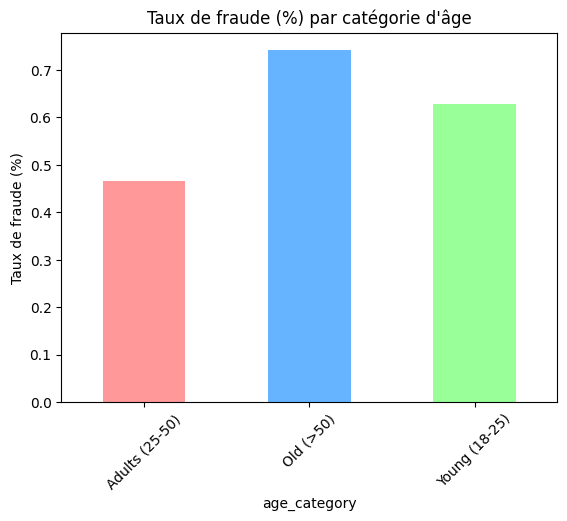

In [5]:

# Convert to datetime
df_train['dob_datetime'] = pd.to_datetime(df_train['dob'])
df_test['dob_datetime'] = pd.to_datetime(df_test['dob'])

# Compute age (in years)
df_train['age'] = (df_train['trans_datetime'] - df_train['dob_datetime']).dt.days / 365.25
df_test['age'] = (df_test['trans_datetime'] - df_test['dob_datetime']).dt.days / 365.25

# Clip to make the data more realistic 
df_train['age'] = df_train['age'].clip(lower=18,upper=100)
df_test['age'] = df_test['age'].clip(lower=18,upper=100)


df_train = df_train.drop(columns=['dob'])
df_test = df_test.drop(columns=['dob'])




def categorize_age(age):
    if 18 <= age <= 25:
        return "Young (18-25)"
    if 25 < age <= 50:
        return "Adults (25-50)"
    else: 
        return "Old (>50)"
    
# Apply 
df_train['age_category'] = df_train['age'].apply(categorize_age)
df_test['age_category'] = df_test['age'].apply(categorize_age)



print("Age statistics :")
print(df_train['age'].describe())
print(df_test['age'].describe())

print("\nDistribution :")
print(df_train['age_category'].value_counts())
print(df_test['age_category'].value_counts())

print("\nMean age for each category :")
print(df_train.groupby('is_fraud')['age'].agg(['mean', 'median', 'std']).round(2))
print(df_test.groupby('is_fraud')['age'].agg(['mean', 'median', 'std']).round(2))


print("\nFraud rate by category :")
fraud_rate = df_train.groupby('age_category')['is_fraud'].agg(['mean']) * 100
print(fraud_rate.round(2))

# Drop columns we don't need anymore 
columns_to_drop = ['trans_date_trans_time']

df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

fraud_by_cat = df_train.groupby('age_category')['is_fraud'].mean() * 100
fraud_by_cat.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Taux de fraude (%) par catégorie d'âge")
plt.ylabel("Taux de fraude (%)")
plt.xticks(rotation=45)
plt.show()


**OTHER DATA ENCODING**

In [6]:


# Identify categorical columns 
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"\n Categorical columns : {len(categorical_columns)}")
for col in categorical_columns:
    nunique = df_train[col].nunique()
    print(f" •{col}: {nunique:,} unique values")


# Gender (M/F -> 1/0) (Label Encoding)
if 'gender' in df_train.columns:
    le_gender = LabelEncoder()
    df_train['gender'] = le_gender.fit_transform(df_train['gender'])
    df_test['gender'] = le_gender.transform(df_test['gender'])

    print(f"\n Gender encoded:")
    print(f"{le_gender.classes_[0]} -> 0")
    print(f"{le_gender.classes_[1]} -> 1")

    print(f"\n After encoding:")
    print(df_train['gender'].value_counts())
else:
    print("\n 'gender' column not found")

df_train.head()


 Categorical columns : 7
 •merchant: 693 unique values
 •category: 14 unique values
 •gender: 2 unique values
 •city: 894 unique values
 •state: 51 unique values
 •job: 494 unique values
 •age_category: 3 unique values

 Gender encoded:
F -> 0
M -> 1

 After encoding:
gender
0    709863
1    586812
Name: count, dtype: int64


,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,hour,day_of_week,day_of_month,month,is_weekend,time_period,distance_km,dob_datetime,age,age_category
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,3495,...,0,1,1,1,0,3,96.884075,1988-03-09,30.814511,Adults (25-50)
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,WA,99160,48.8878,-118.2105,149,...,0,1,1,1,0,3,30.226415,1978-06-21,40.531143,Adults (25-50)
2,fraud_Lind-Buckridge,entertainment,220.11,1,Malad City,ID,83252,42.1808,-112.2620,4154,...,0,1,1,1,0,3,108.318831,1962-01-19,56.950034,Old (>50)
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,MT,59632,46.2306,-112.1138,1939,...,0,1,1,1,0,3,102.097971,1967-01-12,51.969884,Old (>50)
4,fraud_Keeling-Crist,misc_pos,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,99,...,0,1,1,1,0,3,96.404010,1986-03-28,32.763860,Adults (25-50)


In [7]:
# Sépare features et target (temporairement, car originaux encore présents)
temp_X_train = df_train.drop('is_fraud', axis=1)
temp_y_train = df_train['is_fraud']

# Split stratified
X_train_full, X_val, y_train_full, y_val = train_test_split(
    temp_X_train, 
    temp_y_train,
    test_size=0.2,
    random_state=42,
    stratify=temp_y_train  # Maintient la distribution des classes
)

# Convertis en DataFrames pour facilité
X_train_full = pd.DataFrame(X_train_full, columns=temp_X_train.columns)
X_val = pd.DataFrame(X_val, columns=temp_X_train.columns)
y_train_full = pd.Series(y_train_full, name='is_fraud')
y_val = pd.Series(y_val, name='is_fraud')

print(f"\n Split complété (avant encodage cible):")
print(f"   Train full: {X_train_full.shape} - pour encodage et training")
print(f"   Validation: {X_val.shape} - pour tuning")
print(f"   Test: {df_test.shape} - final eval (inchangé)")

# Vérif distribution classes
train_fraud_rate = y_train_full.mean() * 100
val_fraud_rate = y_val.mean() * 100
test_fraud_rate = df_test['is_fraud'].mean() * 100

print(f"\n Vérif distribution classes:")
print(f"   Train full: {y_train_full.sum():,} fraudes / {len(y_train_full):,} = {train_fraud_rate:.3f}%")
print(f"   Val: {y_val.sum():,} fraudes / {len(y_val):,} = {val_fraud_rate:.3f}%")
print(f"   Test: {df_test['is_fraud'].sum():,} fraudes / {len(df_test):,} = {test_fraud_rate:.3f}%")

if abs(train_fraud_rate - val_fraud_rate) < 0.01 and abs(train_fraud_rate - test_fraud_rate) < 0.01:
    print("    Distributions cohérentes !")
else:
    print("    Attention: Légères différences")


 Split complété (avant encodage cible):
   Train full: (1037340, 25) - pour encodage et training
   Validation: (259335, 25) - pour tuning
   Test: (555719, 26) - final eval (inchangé)

 Vérif distribution classes:
   Train full: 6,005 fraudes / 1,037,340 = 0.579%
   Val: 1,501 fraudes / 259,335 = 0.579%
   Test: 2,145 fraudes / 555,719 = 0.386%
    Attention: Légères différences



 Split complété (avant encodage cible):
   Train full: (1037340, 25) - pour encodage et training
   Validation: (259335, 25) - pour tuning
   Test: (555719, 26) - final eval (inchangé)

 Vérif distribution classes:
   Train full: 6,005 fraudes / 1,037,340 = 0.579%
   Val: 1,501 fraudes / 259,335 = 0.579%
   Test: 2,145 fraudes / 555,719 = 0.386%
    Attention: Légères différences
   One-hot states aligné: 51 cols

 5 colonnes catégorielles restantes:
   • merchant: 693 uniques
   • category: 14 uniques
   • city: 894 uniques
   • job: 494 uniques
   • age_category: 3 uniques

 Target Encoding sur restantes...

--- Visualisation du Target Encoding pour 'category' ---
Visualisation 'category_target_encoding_visualization.png' sauvegardée.

--- Visualisation du Target Encoding pour 'job' ---
Visualisation 'job_target_encoding_visualization.png' sauvegardée.

 X_test défini et aligné:
   Shape: (555719, 75)
   Colonnes: 75 (match train_full)
   Exemples: ['amt', 'gender', 'zip', 'lat', 'l

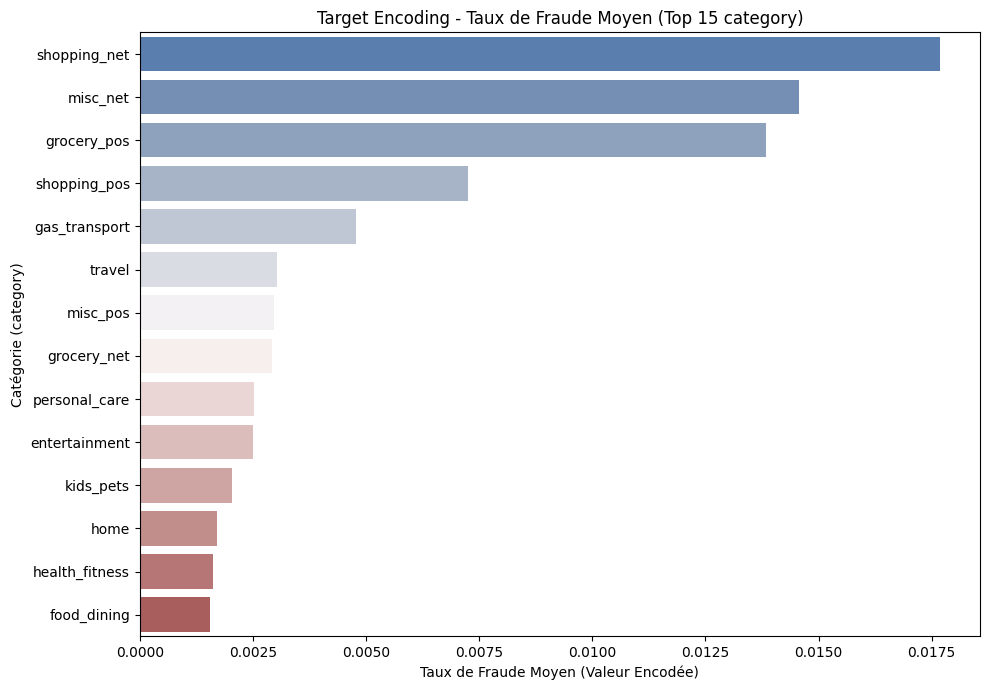

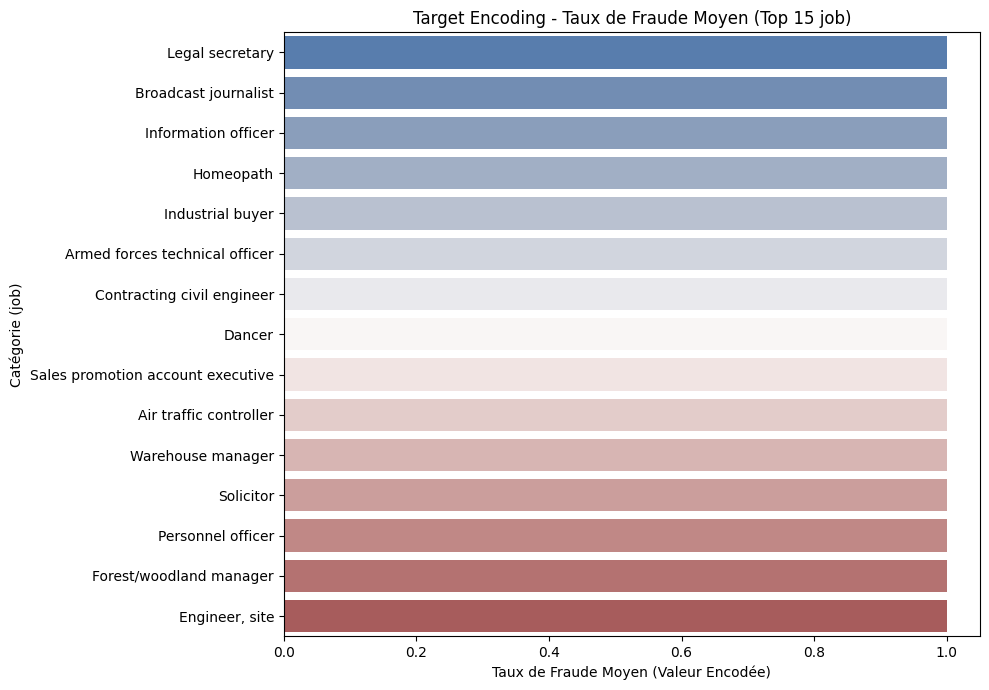

In [8]:
# # Target Encoding for high cardinality columns
# high_card_cols = ['category', 'merchant', 'job']

# for col in high_card_cols:
#     if col in df_train.columns:
#         fraud_rates = df_train.groupby(col)['is_fraud'].mean()
#         global_mean = df_train['is_fraud'].mean()

#         df_train[f'{col}_encoded'] = df_train[col].map(fraud_rates)
#         df_test[f'{col}_encoded'] = df_test[col].map(fraud_rates).fillna(global_mean)

#         # Show top 5 encoded values
#         print(f"   Top 5 {col} by fraud rate:")
#         top_fraud_rates = fraud_rates.sort_values(ascending=False).head(5)
#         for cat, rate in top_fraud_rates.items():
#             print(f"      {cat}: {rate:.4f}")

#         # Drop original column
#         df_train = df_train.drop(columns=[col])
#         df_test = df_test.drop(columns=[col])


# # State encoding
# if 'state' in df_train.columns:
#     n_states = df_train['state'].nunique()

#     if n_states <= 60:
#         # One-hot encoding
#         df_train = pd.get_dummies(df_train, columns=['state'], prefix='state', drop_first=False)
#         df_test = pd.get_dummies(df_test, columns=['state'], prefix='state', drop_first=False)

#         # Align columns (in case test has different states)
#         train_cols = set(df_train.columns)
#         test_cols = set(df_test.columns)

#         # Add missing columns to test
#         for col in train_cols - test_cols:
#             df_test[col] = 0

#         # Remove extra columns from test
#         for col in test_cols - train_cols:
#             df_test = df_test.drop(columns=[col])

#         # Reorder test columns to match train
#         df_test = df_test[df_train.columns]
#     else:
#         # Target encode if too many states 
#         fraud_rates = df_train.groupby('state')['is_fraud'].mean()
#         global_mean = df_train['is_fraud'].mean()

#         df_train['state_encoded'] = df_train['state'].map(fraud_rates)
#         df_test['state_encoded'] = df_test['state'].map(fraud_rates).fillna(global_mean)

#         df_train = df_train.drop(columns=['state'])
#         df_test = df_test.drop(columns=['state'])


# # Check for any remaining object columns
# remaining_cats = df_train.select_dtypes(include=['object']).columns.tolist()

# if remaining_cats:
#     print(f"\n Found {len(remaining_cats)} remaining categorical columns:")
#     for col in remaining_cats:
#         nunique = df_train[col].nunique()
#         print(f"   • {col}: {nunique:,} unique values")

#     print("\n Applying Target Encoding to remaining columns...")
#     for col in remaining_cats:
#         fraud_rates = df_train.groupby(col)['is_fraud'].mean()
#         global_mean = df_train['is_fraud'].mean()

#         df_train[f'{col}_encoded'] = df_train[col].map(fraud_rates)
#         df_test[f'{col}_encoded'] = df_test[col].map(fraud_rates).fillna(global_mean)

#         df_train = df_train.drop(columns=[col])
#         df_test = df_test.drop(columns=[col])


# df_train.head()

# Sépare features et target (temporairement, car originaux encore présents)
temp_X_train = df_train.drop('is_fraud', axis=1)
temp_y_train = df_train['is_fraud']

# Split stratified
X_train_full, X_val, y_train_full, y_val = train_test_split(
    temp_X_train, 
    temp_y_train,
    test_size=0.2,
    random_state=42,
    stratify=temp_y_train  # Maintient la distribution des classes
)

# Convertis en DataFrames pour facilité
X_train_full = pd.DataFrame(X_train_full, columns=temp_X_train.columns)
X_val = pd.DataFrame(X_val, columns=temp_X_train.columns)
y_train_full = pd.Series(y_train_full, name='is_fraud')
y_val = pd.Series(y_val, name='is_fraud')

print(f"\n Split complété (avant encodage cible):")
print(f"   Train full: {X_train_full.shape} - pour encodage et training")
print(f"   Validation: {X_val.shape} - pour tuning")
print(f"   Test: {df_test.shape} - final eval (inchangé)")

# Vérif distribution classes
train_fraud_rate = y_train_full.mean() * 100
val_fraud_rate = y_val.mean() * 100
test_fraud_rate = df_test['is_fraud'].mean() * 100

print(f"\n Vérif distribution classes:")
print(f"   Train full: {y_train_full.sum():,} fraudes / {len(y_train_full):,} = {train_fraud_rate:.3f}%")
print(f"   Val: {y_val.sum():,} fraudes / {len(y_val):,} = {val_fraud_rate:.3f}%")
print(f"   Test: {df_test['is_fraud'].sum():,} fraudes / {len(df_test):,} = {test_fraud_rate:.3f}%")

if abs(train_fraud_rate - val_fraud_rate) < 0.01 and abs(train_fraud_rate - test_fraud_rate) < 0.01:
    print("    Distributions cohérentes !")
else:
    print("    Attention: Légères différences")


# State encoding (après split)
if 'state' in X_train_full.columns:
    n_states = X_train_full['state'].nunique()

    if n_states <= 60:
        # One-hot SEULEMENT sur train_full
        X_train_full = pd.get_dummies(X_train_full, columns=['state'], prefix='state', drop_first=False)
        
        # Sur val
        X_val = pd.get_dummies(X_val, columns=['state'], prefix='state', drop_first=False)
        
        # Sur test
        df_test = pd.get_dummies(df_test, columns=['state'], prefix='state', drop_first=False)

        # Alignement : Ajoute missing cols avec 0
        train_cols = set(X_train_full.columns)
        val_cols = set(X_val.columns)
        test_cols = set(df_test.columns)

        # Ajoute à val
        for col in train_cols - val_cols:
            if col.startswith('state_'):
                X_val[col] = 0
        # Ajoute à test
        for col in train_cols - test_cols:
            if col.startswith('state_'):
                df_test[col] = 0

        # Supprime extras en val/test (rare)
        for col in list(val_cols - train_cols):
            if col.startswith('state_'):
                X_val = X_val.drop(columns=[col])
        for col in list(test_cols - train_cols):
            if col.startswith('state_'):
                df_test = df_test.drop(columns=[col])

        # Réordonne pour matcher train
        X_val = X_val[X_train_full.columns]
        df_test_features = df_test.drop('is_fraud', axis=1)  # Pour plus tard
        df_test_features = df_test_features[X_train_full.columns]  # Align test features
        print(f"   One-hot states aligné: {len([c for c in X_train_full.columns if c.startswith('state_')])} cols")
    else:
        # Target encode si trop (même logique que high_card)
        temp_train = X_train_full[['state']].copy()
        temp_train['is_fraud'] = y_train_full
        fraud_rates = temp_train.groupby('state')['is_fraud'].mean()
        global_mean = y_train_full.mean()

        X_train_full['state_encoded'] = X_train_full['state'].map(fraud_rates)
        X_val['state_encoded'] = X_val['state'].map(fraud_rates).fillna(global_mean)
        df_test['state_encoded'] = df_test['state'].map(fraud_rates).fillna(global_mean)

        X_train_full = X_train_full.drop(columns=['state'])
        X_val = X_val.drop(columns=['state'])
        df_test = df_test.drop(columns=['state'])


# Remaining categorical columns (target encode après split)
remaining_cats = X_train_full.select_dtypes(include=['object']).columns.tolist()

if remaining_cats:
    print(f"\n {len(remaining_cats)} colonnes catégorielles restantes:")
    for col in remaining_cats:
        nunique = X_train_full[col].nunique()
        print(f"   • {col}: {nunique:,} uniques")

    print("\n Target Encoding sur restantes...")
    for col in remaining_cats:
        temp_train = X_train_full[[col]].copy()
        temp_train['is_fraud'] = y_train_full
        fraud_rates = temp_train.groupby(col)['is_fraud'].mean()
        global_mean = y_train_full.mean()

        if col == 'category' or col == 'job':
            print(f"\n--- Visualisation du Target Encoding pour '{col}' ---")
            
            # Prendre le Top 15 des catégories/jobs avec le plus haut taux de fraude
            top_n = 15
            top_categories = fraud_rates.sort_values(ascending=False).head(top_n)
            
            plt.figure(figsize=(10, 7)) # Ajuster la taille si besoin
            sns.barplot(x=top_categories.values, y=top_categories.index, palette='vlag')
            plt.title(f'Target Encoding - Taux de Fraude Moyen (Top {top_n} {col})')
            plt.xlabel('Taux de Fraude Moyen (Valeur Encodée)')
            plt.ylabel(f'Catégorie ({col})')
            plt.tight_layout()
            
            plt.savefig(f'{col}_target_encoding_visualization.png')
            print(f"Visualisation '{col}_target_encoding_visualization.png' sauvegardée.")

        X_train_full[f'{col}_encoded'] = X_train_full[col].map(fraud_rates)
        X_val[f'{col}_encoded'] = X_val[col].map(fraud_rates).fillna(global_mean)
        df_test[f'{col}_encoded'] = df_test[col].map(fraud_rates).fillna(global_mean)

        X_train_full = X_train_full.drop(columns=[col])
        X_val = X_val.drop(columns=[col])
        df_test = df_test.drop(columns=[col])


# ============================================================================
# DÉFINIR X_TEST APRÈS ENCOGAGE (AVANT CORRECTIONS)
# ============================================================================

# Extrait features de test (sans target)
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

# Align colonnes de X_test à X_train_full (remplit manquantes avec 0)
X_test = X_test.reindex(columns=X_train_full.columns, fill_value=0)

print(f"\n X_test défini et aligné:")
print(f"   Shape: {X_test.shape}")
print(f"   Colonnes: {len(X_test.columns)} (match train_full)")
print(f"   Exemples: {X_test.columns[:5].tolist()}")

# Vérif y_test
print(f"   y_test: {y_test.shape} - {y_test.sum():,} fraudes ({y_test.mean()*100:.3f}%)")

**VERIFICATION**

In [9]:

# Check unknowns en val (ex. pour category si pas encore encodé, mais comme on l'a fait après, skip ou adapte)
print("\n Check leakage: Taux corrélation encoded vs target (sur train_full)")
encoded_cols = [col for col in X_train_full.columns if 'encoded' in col]
for col in encoded_cols[:3]:  # Top 3
    corr = X_train_full[col].corr(y_train_full)
    print(f"   {col}: corr = {corr:.4f}")
    if abs(corr) > 0.6:
        print("      WARNING: Haute corrélation → check overfitting")



 Check leakage: Taux corrélation encoded vs target (sur train_full)
   merchant_encoded: corr = 0.0742
   category_encoded: corr = 0.0706
   city_encoded: corr = 0.2793


**CORRECTIONS**

In [10]:
# # 1. Remove remaining datetime columns
# datetime_cols = df_train.select_dtypes(include=['datetime64']).columns.tolist()
# if datetime_cols:
#     print(f"\n Removing {len(datetime_cols)} datetime columns:")
#     for col in datetime_cols:
#         print(f"    {col}")
#     df_train = df_train.drop(columns=datetime_cols)
#     df_test = df_test.drop(columns=datetime_cols)
#     print("    Datetime columns removed")
# else:
#     print("\n No datetime columns to remove")

# # 2. Convert bool columns to int (for state_* columns)
# bool_cols = df_train.select_dtypes(include=['bool']).columns.tolist()
# if bool_cols:
#     print(f"\n Converting {len(bool_cols)} boolean columns to int:")
#     df_train[bool_cols] = df_train[bool_cols].astype(int)
#     df_test[bool_cols] = df_test[bool_cols].astype(int)
#     print(f"    {len(bool_cols)} columns converted (bool -> int)")
# else:
#     print("\n No boolean columns to convert")

# # 3. Verify all columns are numeric

# print(f"\n Final data types:")
# print(df_train.dtypes.value_counts())

# # Check for non-numeric columns
# non_numeric = df_train.select_dtypes(exclude=['int64', 'int32', 'float64']).columns.tolist()
# if non_numeric:
#     print(f"\n WARNING: {len(non_numeric)} non-numeric columns found:")
#     for col in non_numeric:
#         print(f"   • {col}: {df_train[col].dtype}")
# else:
#     print(f"\n SUCCESS: All columns are numeric!")

# print(f"\n Final shapes:")
# print(f"   TRAIN: {df_train.shape}")
# print(f"   TEST: {df_test.shape}")

# # Show column summary
# print(f"\n Column breakdown:")
# print(f"   • Target variable: is_fraud")
# print(f"   • Numeric features: {df_train.shape[1] - 1}")
# print(f"   • Total columns: {df_train.shape[1]}")

# 1. Drop datetime columns (ex. dob_datetime)
datetime_cols_train = X_train_full.select_dtypes(include=['datetime64']).columns.tolist()
if datetime_cols_train:
    print(f"\n Drop {len(datetime_cols_train)} colonnes datetime sur train_full:")
    for col in datetime_cols_train:
        print(f"    {col}")
    X_train_full = X_train_full.drop(columns=datetime_cols_train)
    
    # Même sur val
    datetime_cols_val = X_val.select_dtypes(include=['datetime64']).columns.tolist()
    X_val = X_val.drop(columns=datetime_cols_val)
    
    # Sur test
    datetime_cols_test = X_test.select_dtypes(include=['datetime64']).columns.tolist()
    X_test = X_test.drop(columns=datetime_cols_test)
    
    print("    Datetimes droppés sur tous les sets")
else:
    print("\n Pas de colonnes datetime à dropper")

# 2. Convert bool columns to int (ex. state_* one-hot)
bool_cols_train = X_train_full.select_dtypes(include=['bool']).columns.tolist()
if bool_cols_train:
    print(f"\n Convert {len(bool_cols_train)} bools → int sur train_full:")
    X_train_full[bool_cols_train] = X_train_full[bool_cols_train].astype(int)
    
    # Même sur val
    bool_cols_val = X_val.select_dtypes(include=['bool']).columns.tolist()
    X_val[bool_cols_val] = X_val[bool_cols_val].astype(int)
    
    # Sur test
    bool_cols_test = X_test.select_dtypes(include=['bool']).columns.tolist()
    X_test[bool_cols_test] = X_test[bool_cols_test].astype(int)
    
    print(f"    {len(bool_cols_train)} colonnes converties (bool → int)")
else:
    print("\n Pas de bools à convertir")

# 3. Vérif finale : Toutes colonnes numériques ?
print(f"\n Types finaux (sur train_full):")
print(X_train_full.dtypes.value_counts())

non_numeric_train = X_train_full.select_dtypes(exclude=['int64', 'int32', 'float64']).columns.tolist()
if non_numeric_train:
    print(f"\n WARNING: {len(non_numeric_train)} non-numériques trouvées:")
    for col in non_numeric_train:
        print(f"   • {col}: {X_train_full[col].dtype}")
else:
    print(f"\n SUCCESS: Toutes colonnes numériques !")

# Align shapes après corrections (si besoin)
print(f"\n Shapes après corrections:")
print(f"   X_train_full: {X_train_full.shape}")
print(f"   X_val: {X_val.shape}")
print(f"   X_test: {X_test.shape}")

# Vérif alignement colonnes
if set(X_train_full.columns) != set(X_val.columns) or set(X_train_full.columns) != set(X_test.columns):
    print("\n WARNING: Colonnes non alignées ! Réaligne:")
    # Réalignement forcé
    common_cols = X_train_full.columns.tolist()
    X_val = X_val.reindex(columns=common_cols, fill_value=0)  # 0 pour missing
    X_test = X_test.reindex(columns=common_cols, fill_value=0)
    print("    Réaligné avec 0 pour missing")
else:
    print("    Colonnes alignées OK")



 Drop 2 colonnes datetime sur train_full:
    trans_datetime
    dob_datetime
    Datetimes droppés sur tous les sets

 Convert 51 bools → int sur train_full:
    51 colonnes converties (bool → int)

 Types finaux (sur train_full):
int64      57
float64    12
int32       4
Name: count, dtype: int64

 SUCCESS: Toutes colonnes numériques !

 Shapes après corrections:
   X_train_full: (1037340, 73)
   X_val: (259335, 73)
   X_test: (555719, 73)
    Colonnes alignées OK


**CHECK IF THERE IS DATA LEAKAGE**

In [11]:
if 'merchant' in df_train.columns:
    fraud_merchants = df_train['merchant'].str.contains('fraud', case=False, na=False).sum()
    print(f"   Merchants with 'fraud' in name: {fraud_merchants}")
    if fraud_merchants > 0:
        print("    WARNING: Potential data leakage!")


        

   Merchants with 'fraud' in name: 1296675


**FEATURE SCALING**

In [12]:
# # Separate features and target
# X_train = df_train.drop('is_fraud', axis=1)
# y_train = df_train['is_fraud']

# X_test = df_test.drop('is_fraud', axis=1)
# y_test = df_test['is_fraud']

# print(f"\n Separated features and target:")
# print(f"   X_train: {X_train.shape}")
# print(f"   y_train: {y_train.shape}")
# print(f"   X_test: {X_test.shape}")
# print(f"   y_test: {y_test.shape}")


# # Get all numeric columns
# all_cols = X_train.columns.tolist()

# # Identify binary columns (0/1 only) - don't need scaling
# binary_cols = []
# for col in all_cols:
#     unique_vals = X_train[col].nunique()
#     if unique_vals == 2:
#         vals = set(X_train[col].unique())
#         if vals.issubset({0, 1, 0.0, 1.0}):
#             binary_cols.append(col)

# print(f"   Binary columns (no scaling needed): {len(binary_cols)}")
# print(f"   Examples: {binary_cols[:5]}")

# # Columns to scale: all except binary
# cols_to_scale = [col for col in all_cols if col not in binary_cols]
# print(f"\n   Columns to scale: {len(cols_to_scale)}")
# print(f"   Examples: {cols_to_scale[:10]}")

# # Show before scaling (first 3 rows, selected columns)
# print(f"\n Before scaling (sample):")
# sample_cols = ['amt', 'lat', 'age', 'distance_km']
# existing_sample_cols = [col for col in sample_cols if col in X_train.columns]
# print(X_train[existing_sample_cols].head(3))

# # Initialize and fit scaler on TRAIN data only
# print("\n Fitting StandardScaler on TRAIN data...")
# scaler = StandardScaler()
# scaler.fit(X_train[cols_to_scale])

# # Transform both train and test
# X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
# X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# # Show after scaling
# print(f"\n After scaling (same sample):")
# print(X_train[existing_sample_cols].head(3))

# print("\n Verify scaling (should be ~0 mean, ~1 std):")
# for col in existing_sample_cols:
#     if col in cols_to_scale:
#         print(f"   {col}: mean={X_train[col].mean():.6f}, std={X_train[col].std():.6f}")

# À ce stade, X_train_full, X_val ont toutes les features encodées et alignées
X_test = df_test.drop('is_fraud', axis=1)  # Aligné déjà
y_test = df_test['is_fraud']

print(f"\n Séparation features/target après encodage:")
print(f"   X_train_full: {X_train_full.shape}")
print(f"   y_train_full: {y_train_full.shape}")
print(f"   X_val: {X_val.shape}")
print(f"   X_test: {X_test.shape}")

# Colonnes binaires (0/1) - pas de scaling
all_cols = X_train_full.columns.tolist()
binary_cols = []
for col in all_cols:
    unique_vals = X_train_full[col].nunique()
    if unique_vals == 2:
        vals = set(X_train_full[col].unique())
        if vals.issubset({0, 1, 0.0, 1.0}):
            binary_cols.append(col)

print(f"   Colonnes binaires (pas de scaling): {len(binary_cols)}")
print(f"   Exemples: {binary_cols[:5]}")

cols_to_scale = [col for col in all_cols if col not in binary_cols]
print(f"\n   Colonnes à scaler: {len(cols_to_scale)}")
print(f"   Exemples: {cols_to_scale[:10]}")

# Sample avant scaling
print(f"\n Avant scaling (échantillon):")
sample_cols = ['amt', 'lat', 'age', 'distance_km']
existing_sample_cols = [col for col in sample_cols if col in X_train_full.columns]
print(X_train_full[existing_sample_cols].head(3))

# Fit SEULEMENT sur train_full
print("\n Fit StandardScaler sur TRAIN_FULL...")
scaler = StandardScaler()
scaler.fit(X_train_full[cols_to_scale])

# Transform tous
X_train_full[cols_to_scale] = scaler.transform(X_train_full[cols_to_scale])
X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Après
print(f"\n Après scaling (même échantillon):")
print(X_train_full[existing_sample_cols].head(3))

print("\n Vérif scaling (~0 mean, ~1 std sur train_full):")
for col in existing_sample_cols:
    if col in cols_to_scale:
        print(f"   {col}: mean={X_train_full[col].mean():.6f}, std={X_train_full[col].std():.6f}")


 Séparation features/target après encodage:
   X_train_full: (1037340, 73)
   y_train_full: (1037340,)
   X_val: (259335, 73)
   X_test: (555719, 75)
   Colonnes binaires (pas de scaling): 53
   Exemples: ['gender', 'is_weekend', 'state_AK', 'state_AL', 'state_AR']

   Colonnes à scaler: 20
   Exemples: ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'day_of_week']

 Avant scaling (échantillon):
           amt      lat        age  distance_km
509059   51.71  44.6087  28.177960    40.012744
395295   13.78  31.9290  48.626968    80.286202
536531  961.26  48.3400  34.959617    91.705535

 Fit StandardScaler sur TRAIN_FULL...

 Après scaling (même échantillon):
             amt       lat       age  distance_km
509059 -0.118626  1.195429 -1.028601    -1.423264
395295 -0.360128 -1.302040  0.149841    -0.148675
536531  5.672535  1.930369 -0.637785     0.212729

 Vérif scaling (~0 mean, ~1 std sur train_full):
   amt: mean=-0.000000, std=1.000000
   l

**TRAIN / VALIDATION SPLIT**

In [13]:
# # Split train into train_final and validation
# X_train_final, X_val, y_train_final, y_val = train_test_split(
#     X_train, 
#     y_train,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_train  # CRITICAL: maintain class distribution
# )

# print(f"\n Split completed:")
# print(f"   Train (final): {X_train_final.shape} - for training models")
# print(f"   Validation:    {X_val.shape} - for hyperparameter tuning")
# print(f"   Test:          {X_test.shape} - for final evaluation (DON'T TOUCH!)")

# # Verify class distribution
# print(f"\n Class distribution verification:")
# train_fraud_rate = y_train_final.mean() * 100
# val_fraud_rate = y_val.mean() * 100
# test_fraud_rate = y_test.mean() * 100

# print(f"   Train:      {y_train_final.sum():,} frauds / {len(y_train_final):,} = {train_fraud_rate:.3f}%")
# print(f"   Validation: {y_val.sum():,} frauds / {len(y_val):,} = {val_fraud_rate:.3f}%")
# print(f"   Test:       {y_test.sum():,} frauds / {len(y_test):,} = {test_fraud_rate:.3f}%")

# if abs(train_fraud_rate - val_fraud_rate) < 0.01 and abs(train_fraud_rate - test_fraud_rate) < 0.01:
#     print("    Distributions are consistent!")
# else:
#     print("    Warning: Distributions differ slightly")

**HANDLING OF CLASS IMBALANCE (USING SMOTE)**

In [14]:
print("\n The Problem:")
print(f"   Current ratio: ~{int(1/train_fraud_rate*100)}:1 (legitimate:fraud)")
print("   Without balancing:")
print("   • Model will predict 'legitimate' for everything")
print("   • Accuracy = 99.4% but 0 frauds detected!")
print("   • Useless in production")

print("\n Solution: SMOTE (Synthetic Minority Over-sampling Technique)")
print("   • Creates synthetic fraud examples by interpolation")
print("   • Interpolates between existing fraud transactions")
print("   • sampling_strategy=0.3 → target ratio 3:1 (not 1:1, too artificial)")

print("\n CRITICAL RULES:")
print("   1. Apply SMOTE ONLY on train_full (NOT on validation/test!)")
print("   2. Never touch validation/test sets (data leakage!)")
print("   3. Validation/test must reflect real-world distribution")

# Show before SMOTE
print(f"\n BEFORE SMOTE:")
print(f"   Class 0: {(y_train_full == 0).sum():,}")
print(f"   Class 1: {(y_train_full == 1).sum():,}")
print(f"   Ratio: {(y_train_full == 0).sum() / (y_train_full == 1).sum():.1f}:1")

# Apply SMOTE
print("\n Applying SMOTE...")
smote = SMOTE(
    sampling_strategy=0.3,  # Ratio ~3:1
    random_state=42,
    k_neighbors=5
)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train_full)

# Show after SMOTE
print(f"\n AFTER SMOTE:")
print(f"   Class 0 (legitimate): {(y_train_resampled == 0).sum():,}")
print(f"   Class 1 (fraud):      {(y_train_resampled == 1).sum():,}")
print(f"   Ratio: {(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum():.1f}:1")

print(f"\n Size changes:")
print(f"   Before: {X_train_full.shape[0]:,} samples")
print(f"   After:  {X_train_resampled.shape[0]:,} samples")
print(f"   Added:  {X_train_resampled.shape[0] - X_train_full.shape[0]:,} synthetic frauds")

# Convert back to DataFrame (SMOTE returns numpy arrays)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train_full.columns)
y_train_resampled = pd.Series(y_train_resampled, name='is_fraud')

df_train.head()


 The Problem:
   Current ratio: ~172:1 (legitimate:fraud)
   Without balancing:
   • Model will predict 'legitimate' for everything
   • Accuracy = 99.4% but 0 frauds detected!
   • Useless in production

 Solution: SMOTE (Synthetic Minority Over-sampling Technique)
   • Creates synthetic fraud examples by interpolation
   • Interpolates between existing fraud transactions
   • sampling_strategy=0.3 → target ratio 3:1 (not 1:1, too artificial)

 CRITICAL RULES:
   1. Apply SMOTE ONLY on train_full (NOT on validation/test!)
   2. Never touch validation/test sets (data leakage!)
   3. Validation/test must reflect real-world distribution

 BEFORE SMOTE:
   Class 0: 1,031,335
   Class 1: 6,005
   Ratio: 171.7:1

 Applying SMOTE...


  File "c:\Users\sansa\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



 AFTER SMOTE:
   Class 0 (legitimate): 1,031,335
   Class 1 (fraud):      309,400
   Ratio: 3.3:1

 Size changes:
   Before: 1,037,340 samples
   After:  1,340,735 samples
   Added:  303,395 synthetic frauds


,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,...,hour,day_of_week,day_of_month,month,is_weekend,time_period,distance_km,dob_datetime,age,age_category
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,3495,...,0,1,1,1,0,3,96.884075,1988-03-09,30.814511,Adults (25-50)
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,WA,99160,48.8878,-118.2105,149,...,0,1,1,1,0,3,30.226415,1978-06-21,40.531143,Adults (25-50)
2,fraud_Lind-Buckridge,entertainment,220.11,1,Malad City,ID,83252,42.1808,-112.2620,4154,...,0,1,1,1,0,3,108.318831,1962-01-19,56.950034,Old (>50)
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,MT,59632,46.2306,-112.1138,1939,...,0,1,1,1,0,3,102.097971,1967-01-12,51.969884,Old (>50)
4,fraud_Keeling-Crist,misc_pos,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,99,...,0,1,1,1,0,3,96.404010,1986-03-28,32.763860,Adults (25-50)
